<a href="https://colab.research.google.com/github/YuliaBudko/deblurring-images-with-richardson-lucy/blob/main/Richardson_Lucy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trying stuff

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io
from skimage.color import rgb2gray

# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename):
  # Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  #img = tf.image.resize(img, size=[img_shape, img_shape])


  if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]
  #tf.image.rgb_to_grayscale(img)

  # Convert to grayscale, not currently working for some reason
  if len(img.shape) == 3:
    #img = img/255.
    img = color.rgb2gray(img)
    print(len(img.shape))

  # Rescale the image (get all values between 0 and 1)
  # img = img/255.
  return img

In [ ]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math


def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


In [ ]:
def gaussian_kernel(size, sigma, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    '''
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
    '''

    # print(kernel_2D)

    return kernel_2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration, img_as_float
import tensorflow as tf

'''
rng = np.random.default_rng()
image = load_and_prep_image

#astro = color.rgb2gray(data.astronaut())

# Fix the psf to be gaussian psf
# psf = np.ones((5, 5)) / 25
kernel_size = 15
psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose = verbose)

blurred_image = conv2(image, psf, 'same')
# Add Noise to Image
'''
rng = np.random.default_rng()
# Image that I blurred in different program, can implement that here later
blurred_image = load_and_prep_image("Screenshot 2023-07-12 at 12.02.41.png")

# Making image noise, can implement later
# image_noisy = blurred_image
# image_noisy += (rng.poisson(lam=25, size=blurred_image.shape) - 10) / 255.

kernel_size = 15
psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
# blurred_image_cast = tf.squeeze(blurred_image)
blurred_image_cast = img_as_float(blurred_image)

#blurred_image_cast = tf.cast(blurred_image, tf.float32)
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(blurred_image)
ax[0].set_title('Original Data')

ax[1].imshow(blurred_image)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

NotFoundError: ignored

Trying another thing

### Functions

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io
from skimage.color import rgb2gray
import numpy as np
import cv2
import argparse
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration, img_as_float
import tensorflow as tf

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename):
  # Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  #img = tf.image.resize(img, size=[img_shape, img_shape])
  if img.shape[2] == 1:
    img = tf.squeeze(img, axis=2)

  if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]
  #tf.image.rgb_to_grayscale(img)

  # Convert to grayscale, not currently working for some reason
  if len(img.shape) == 3:
    #img = img/255.
    img = rgb2gray(img)
    print(len(img.shape))

  # Rescale the image (get all values between 0 and 1)
  # img = img/255.
  return img

In [ ]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [ ]:
def gaussian_kernel(size, sigma, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    '''
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
    '''

    # print(kernel_2D)

    return kernel_2D

In [ ]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        image = rgb2gray(image)
        # print("Converted to Gray Channel")
    #else:
        # print("Image Shape : {}".format(image.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    if (kernel_row % 2) == 0:
      pad_height = int(((kernel_row - 1) / 2) + 1)
      pad_width = int(((kernel_col - 1) / 2) + 1)
    else:
      pad_height = int((kernel_row - 1) / 2)
      pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    '''
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
    '''
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    # print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output


In [ ]:
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

### Generating blurred image

2


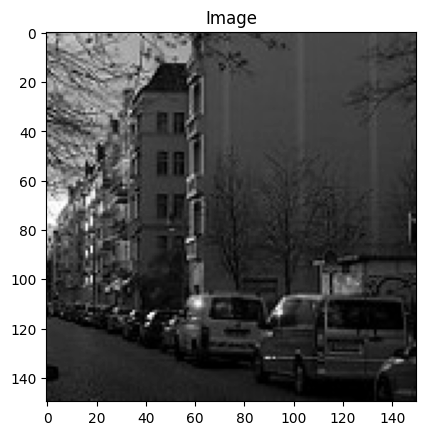

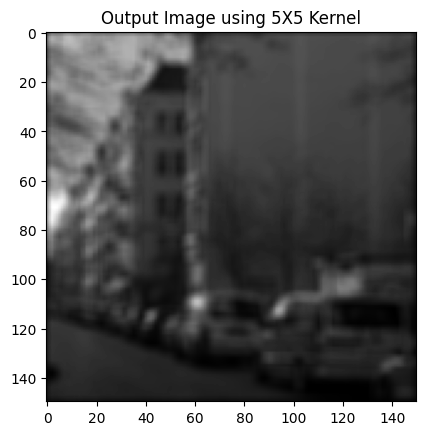

In [ ]:
image = "0.jpg"
image = load_and_prep_image("0.jpg")
blurred_image = gaussian_blur(image, 5, verbose=True)

In [ ]:
rng = np.random.default_rng()

# Making image noise
# image_noisy = blurred_image
# image_noisy += (rng.poisson(lam=25, size=blurred_image.shape) - 10) / 255.

kernel_size = 5
psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

### Deblurring the image

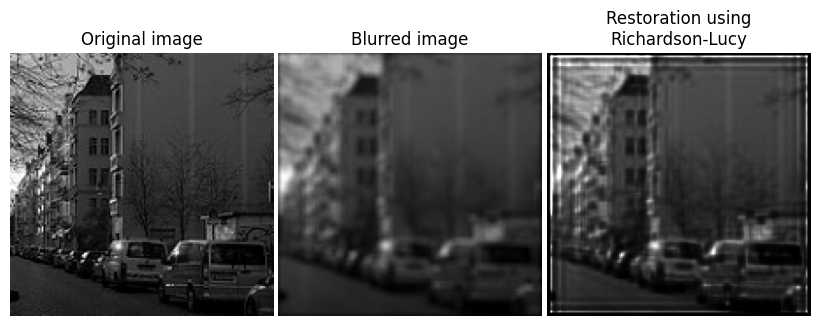

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

### Trying with different kernels

#### 10 x 10 kernel

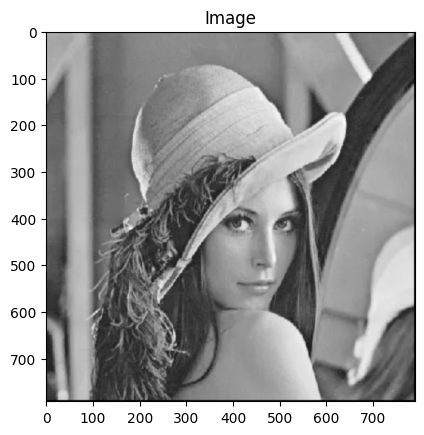

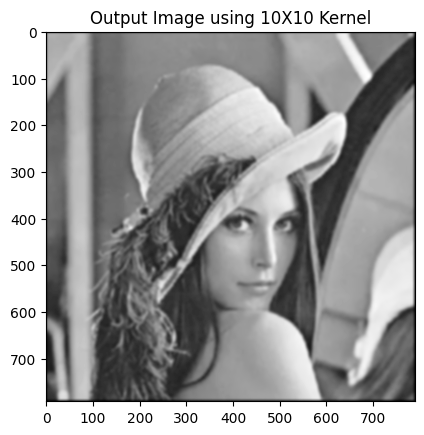

In [ ]:
kernel_size = 10
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

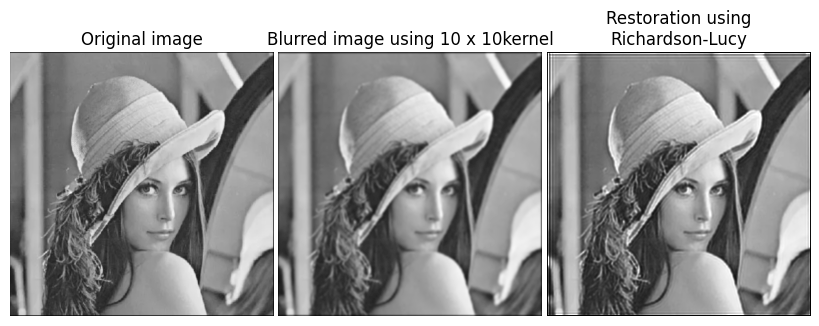

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using ' + str(kernel_size) + ' x ' + str(kernel_size) + 'kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

5 x 5 kernel

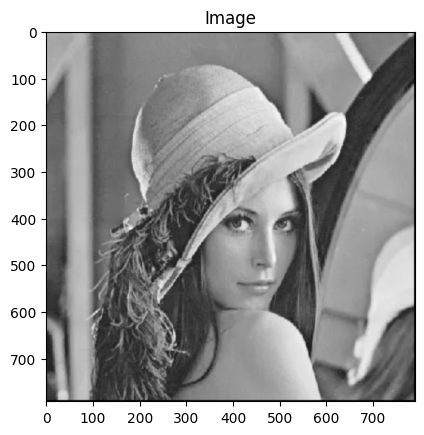

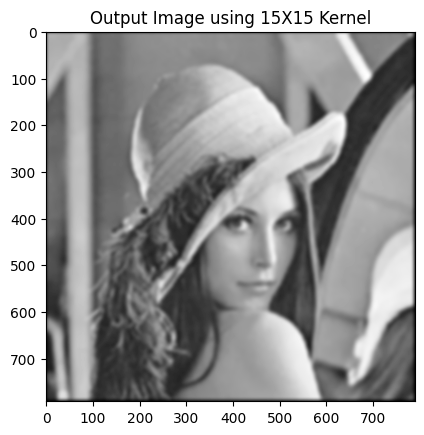

In [ ]:
kernel_size = 15
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

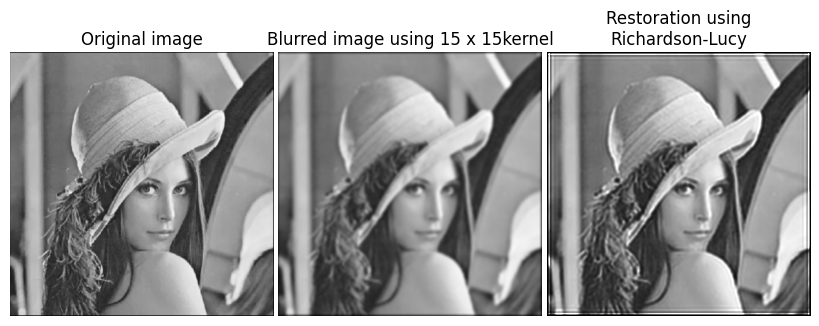

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using ' + str(kernel_size) + ' x ' + str(kernel_size) + 'kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

Finding at which size convolution will fail

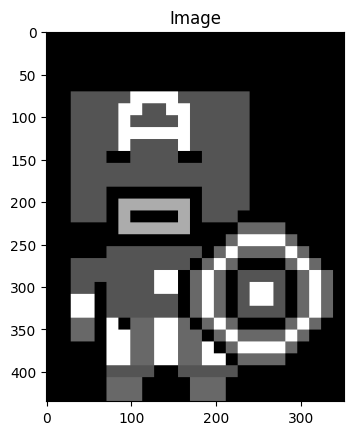

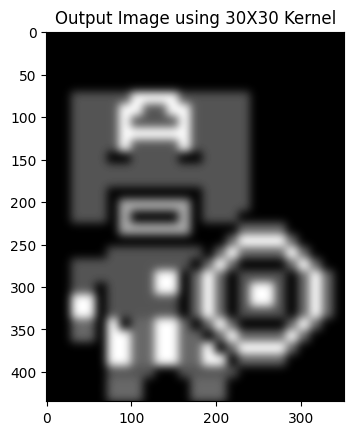

In [ ]:
kernel_size = 30
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

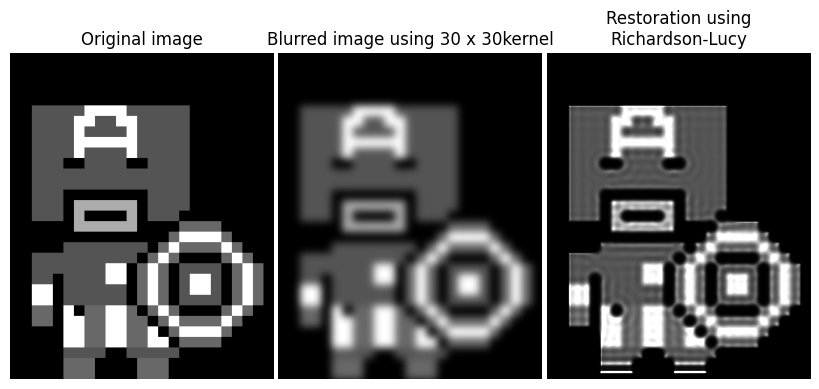

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=1000)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using ' + str(kernel_size) + ' x ' + str(kernel_size) + 'kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

### Testing with different image

2
(435, 351)
[[2.66985893e-109 4.40185101e-109 7.25015344e-109 ... 7.25015344e-109
  4.40185101e-109 2.66985893e-109]
 [4.40185101e-109 7.25742175e-109 1.19534762e-108 ... 1.19534762e-108
  7.25742175e-109 4.40185101e-109]
 [7.25015344e-109 1.19534762e-108 1.96882031e-108 ... 1.96882031e-108
  1.19534762e-108 7.25015344e-109]
 ...
 [7.25015344e-109 1.19534762e-108 1.96882031e-108 ... 1.96882031e-108
  1.19534762e-108 7.25015344e-109]
 [4.40185101e-109 7.25742175e-109 1.19534762e-108 ... 1.19534762e-108
  7.25742175e-109 4.40185101e-109]
 [2.66985893e-109 4.40185101e-109 7.25015344e-109 ... 7.25015344e-109
  4.40185101e-109 2.66985893e-109]]


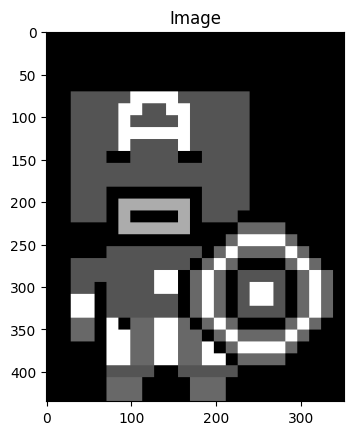

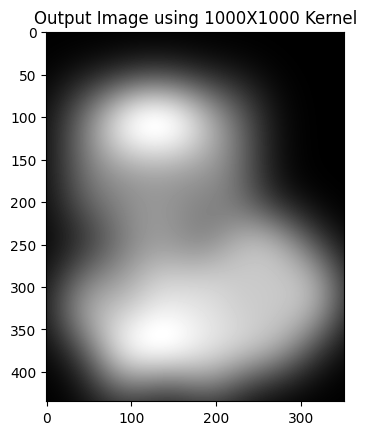

[[2.66985893e-109 4.40185101e-109 7.25015344e-109 ... 7.25015344e-109
  4.40185101e-109 2.66985893e-109]
 [4.40185101e-109 7.25742175e-109 1.19534762e-108 ... 1.19534762e-108
  7.25742175e-109 4.40185101e-109]
 [7.25015344e-109 1.19534762e-108 1.96882031e-108 ... 1.96882031e-108
  1.19534762e-108 7.25015344e-109]
 ...
 [7.25015344e-109 1.19534762e-108 1.96882031e-108 ... 1.96882031e-108
  1.19534762e-108 7.25015344e-109]
 [4.40185101e-109 7.25742175e-109 1.19534762e-108 ... 1.19534762e-108
  7.25742175e-109 4.40185101e-109]
 [2.66985893e-109 4.40185101e-109 7.25015344e-109 ... 7.25015344e-109
  4.40185101e-109 2.66985893e-109]]


In [ ]:
image = "Daco_4907946.png"
image = load_and_prep_image("Daco_4907946.png")
print(image.shape)
kernel_size = 1000
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

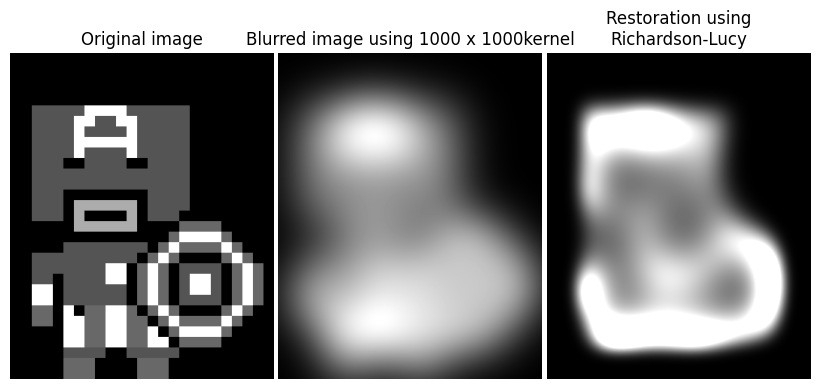

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using ' + str(kernel_size) + ' x ' + str(kernel_size) + 'kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

### Generating image with random dots

(200, 200)


"\n\n\nsize = 500\nvalues = np.zeros((size,size))\nprobability = 3\npixel = 0\nfor i in range (size):\n  for j in range (size):\n    value = random.randint(0, probability)\n    # print(value)\n    if value == 0:\n      pixel = 0\n    else:\n      pixel = 256\n    values[i][j] = pixel\n\n# print(values)\nimage = Image.fromarray(values)\n\nplt.imshow(image, cmap = 'gray')\n\nprint(values.shape)\n\nimage = values\n"

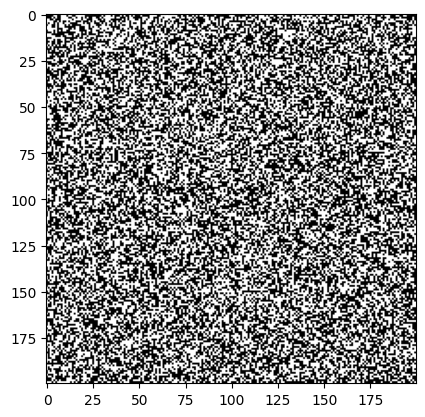

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# numpy.random.randint returns an array of random integers
# from low (inclusive) to high (exclusive). i.e. low <= value < high

pixel_data = np.random.randint(
    2,
    size=(200, 200),
    dtype=np.uint8
)

image = Image.fromarray(pixel_data)

plt.imshow(image, cmap = 'gray')

print(pixel_data.shape)

image = pixel_data
'''


size = 500
values = np.zeros((size,size))
probability = 3
pixel = 0
for i in range (size):
  for j in range (size):
    value = random.randint(0, probability)
    # print(value)
    if value == 0:
      pixel = 0
    else:
      pixel = 256
    values[i][j] = pixel

# print(values)
image = Image.fromarray(values)

plt.imshow(image, cmap = 'gray')

print(values.shape)

image = values
'''


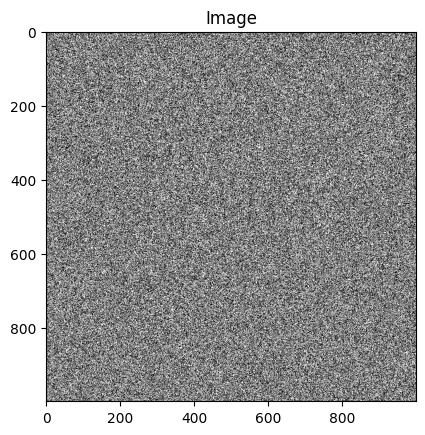

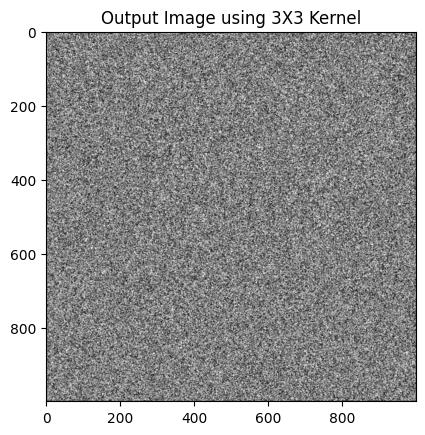

In [ ]:
kernel_size = 3
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

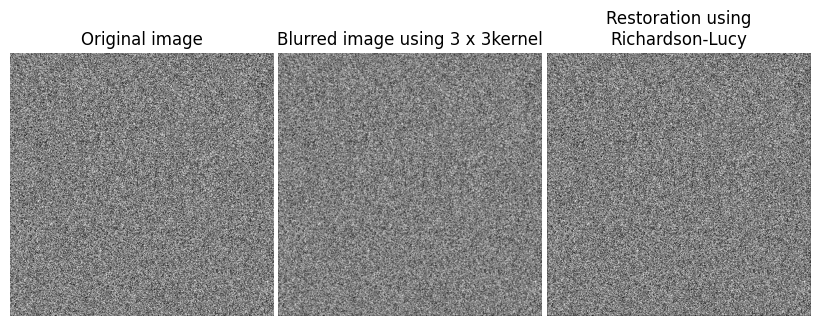

In [ ]:
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using ' + str(kernel_size) + ' x ' + str(kernel_size) + 'kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

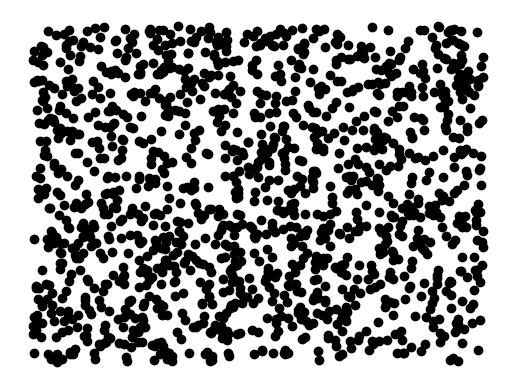

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

N = 1400
# arr2 = [[0 for col in range(N)] for row in range(N)]

x = np.random.rand(N)
# print(x)
y = np.random.rand(N)


plt.scatter(x,y, c = 'black')
plt.axis('off')
# plt.margins(x=0)
plt.savefig("dots.png", bbox_inches='tight')
plt.show()

2
(389, 515)


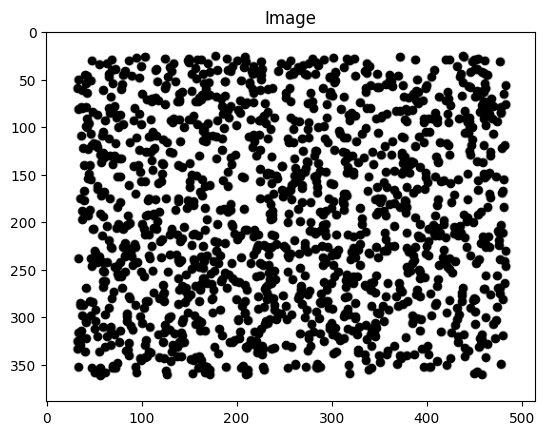

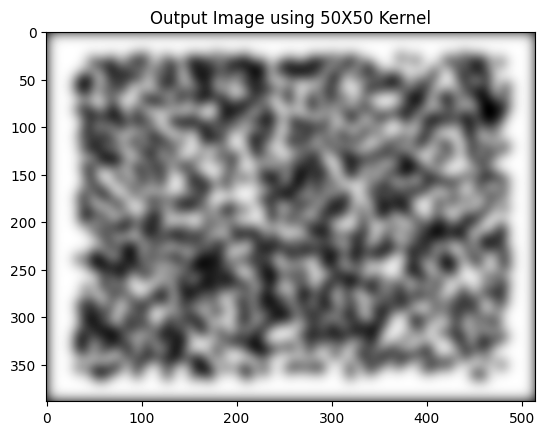

In [ ]:
image = "dots.png"
image = load_and_prep_image("dots.png")
print(image.shape)
kernel_size = 50
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

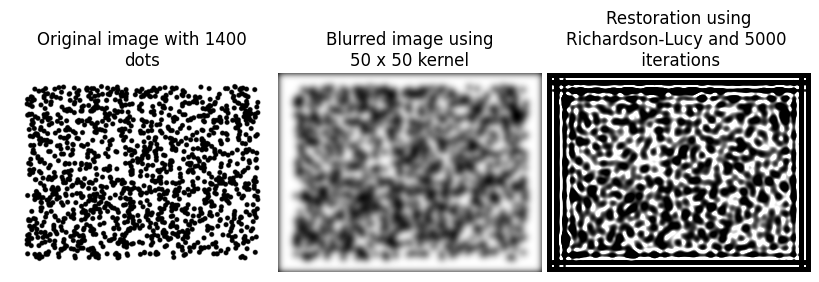

In [ ]:
iterations = 5000
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=iterations)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image with ' + str(N) + '\ndots')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using\n' + str(kernel_size) + ' x ' + str(kernel_size) + ' kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy and ' + str(iterations) + ' \n iterations')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

# R-L on specific images from dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
image = "gdrive/MyDrive/Kaggle/color/785.jpg"
image = load_and_prep_image("gdrive/MyDrive/Kaggle/color/785.jpg")
print(image.shape)
kernel_size = 5
blurred_image = gaussian_blur(image, kernel_size, verbose=True)

psf = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))

# Restore Image using Richardson-Lucy algorithm
blurred_image_cast = img_as_float(blurred_image)

NameError: ignored

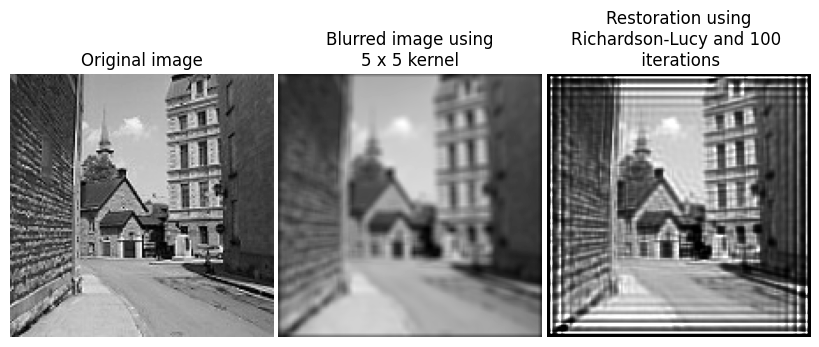

In [ ]:
iterations = 100
deconvolved_RL = restoration.richardson_lucy(blurred_image_cast, psf, num_iter=iterations)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(blurred_image)
ax[1].set_title('Blurred image using\n' + str(kernel_size) + ' x ' + str(kernel_size) + ' kernel')

ax[2].imshow(deconvolved_RL, vmin=blurred_image.min(), vmax=blurred_image.max())
ax[2].set_title('Restoration using\nRichardson-Lucy and ' + str(iterations) + ' \n iterations')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()